In [33]:
import random
from functools import reduce
from math import sqrt,log,sin,cos,pi
import statistics
import seaborn as sns
import scipy.stats as sp
#użyte wzory: stdev - odchylenie standardowe https://www.geeksforgeeks.org/python-statistics-stdev/

outputList = []


In [34]:
#functionsTo use 
def average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst) 

def normalDist(mu,sigma):
    u = random.random()
    v = random.random()

    z1 = sqrt(-2 * log(u)) * sin(2 * pi * v)
    z2 = sqrt(-2 * log(u)) * cos(2 * pi * v)
    
    x1 = mu + z1 * sigma
    x2 = mu + z2 * sigma

    return x2

def temperatureClassyfying(temp,stdDev):
    if temp > -25 and temp < -15:
        result = normalDist(abs(temp),stdDev)*30
    elif temp >= -15 and temp<0:
        result = normalDist(abs(temp),stdDev)*20
    elif temp >=0 and temp < 10:
        result = normalDist(abs(temp),stdDev)*10
    elif temp >=10 and temp <25:
        result = normalDist(abs(temp),stdDev)*20
    
    return result

def simpleStage(start,end,cycles,multiplier):
    baseMagnitude = [random.uniform(start,end) for x in range(cycles)]
    avgBase = average(baseMagnitude)
    stDev = statistics.stdev(baseMagnitude)
    result = normalDist(avgBase,stDev) *multiplier
    return result
        


In [35]:
def stage1(): #waga plecaka 
    return simpleStage(15,40,50,50)

def stage2(): # ukształtowanie terenu w skali od 1 do 20
    return simpleStage(1,20,50,80)

def stage3(): #stopien zmęczenia
    return simpleStage(1,10,50,40)

def stage4(): # stopien padania deszczu, stopien wiania wiatru, wysokie niskie temperatury
    rainMagnitude = [random.uniform(5,15) for x in range(50)]
    windMagnitude = [random.uniform(1,10) for x in range(50)]
    temperatureRange = [random.uniform(-25,25) for x in range(50)]
    
    avgRain = average(rainMagnitude)
    avgWind = average(windMagnitude)
    temperature = random.choice(temperatureRange)
    
    stdDevRain=( statistics.stdev(rainMagnitude) )
    stdDevWind = ( statistics.stdev(windMagnitude) )
    stdDevTemp = ( statistics.stdev(temperatureRange) )
    
    r1 = normalDist(avgRain,stdDevRain)*random.uniform(10,20) 
    r2 = normalDist(avgWind,stdDevWind)*random.uniform(10,20) 
    r3 = temperatureClassyfying(temperature,stdDevTemp)
    
    result = r1+r2+r3
    return result


def stage5(): # nasza Waga
    weight = [random.uniform(50,90) for x in range(50)]
    avgLevel = average(weight)
    stDev = statistics.stdev(weight)
    multiplier = random.uniform(3,12) #nasze zaawansowanie fizyczne. Im mniejsza liczba tym mniej kalorii zużyjemy
    result = normalDist(avgLevel,stDev)*multiplier
    return result


def stage6(): # dodanie wartosci odzywczych od do ileś kcal.
    return simpleStage(1300,2500,50,1)


In [36]:
def main():
    generalResult = 0.0
    
    for x in range(2000): #monte carlo
        generalResult+=stage1()
        generalResult+=stage2()
        generalResult+=stage3()
        generalResult+=stage4()
        generalResult+=stage5()
        generalResult-=stage6()
        outputList.append(generalResult)
        generalResult=0.0

        
if __name__ == '__main__':
    main()
        


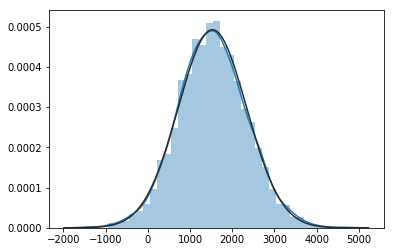

In [37]:
sns.distplot(outputList,fit=sp.norm,kde=True)
